# NLTK PROCESS

## Dependances

In [22]:
import re
import os 
import sys
from urllib.request import urlopen
import requests
import pprint


In [23]:
import nltk
from nltk import sent_tokenize
from nltk import word_tokenize
from nltk.grammar import DependencyGrammar
from nltk.parse import CoreNLPParser



In [24]:
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns

In [25]:
# from rich import print
from rich.console import Console
console=Console(record=True)

In [26]:
console.print(re.match('Jim','JimDowd'),style="bold black on white")

<re.Match object; span=(0, 3), match='Jim'>

## Get Data

### from file

In [27]:
with open("../data/t1.txt") as f:   
    text = f.read()
text

'The fourth Wells account moving to another agency is the packaged paper-products division of Georgia-Pacific Corp., which arrived at Wells only last fall. Like Hertz and the History Channel, it is also leaving for an Omnicom-owned agency, the BBDO South unit of BBDO Worldwide. BBDO South in Atlanta, which handles corporate advertising for Georgia-Pacific, will assume additional duties for brands like Angel Soft toilet tissue and Sparkle paper towels, said Ken Haldin, a spokesman for Georgia-Pacific in Atlanta.'

### from url

In [28]:
# url = "https://www.hq.nasa.gov/alsj/LM03_Apollo_Spacecraft_AS1-6.pdf"
# # html = urlopen(url).read()

# html= requests.get(url)


# text = BeautifulSoup(html.text, 'html.parser').get_text()
# text[:200]

## Text Pre-processing

### Sentence tokenizing:

In [29]:
sentences=sent_tokenize(text)
console.print(f'Number of sentences:{len(sentences)}')

console.print(sentences,style="bold blue on white")

Number of sentences:3

[
    'The fourth Wells account moving to another agency is the packaged paper-products 
division of Georgia-Pacific Corp., which arrived at Wells only last fall.',
    'Like Hertz and the History Channel, it is also leaving for an Omnicom-owned agency, the 
BBDO South unit of BBDO Worldwide.',
    'BBDO South in Atlanta, which handles corporate advertising for Georgia-Pacific, will 
assume additional duties for brands like Angel Soft toilet tissue and Sparkle paper towels, 
said Ken Haldin, a spokesman for Georgia-Pacific in Atlanta.'
]

### Word tokenizing

In [30]:
words=word_tokenize(text)
console.print(f'Number of words: {len(words)}')

print(words)

Number of words: 88

['The', 'fourth', 'Wells', 'account', 'moving', 'to', 'another', 'agency', 'is', 'the', 'packaged', 'paper-products', 'division', 'of', 'Georgia-Pacific', 'Corp.', ',', 'which', 'arrived', 'at', 'Wells', 'only', 'last', 'fall', '.', 'Like', 'Hertz', 'and', 'the', 'History', 'Channel', ',', 'it', 'is', 'also', 'leaving', 'for', 'an', 'Omnicom-owned', 'agency', ',', 'the', 'BBDO', 'South', 'unit', 'of', 'BBDO', 'Worldwide', '.', 'BBDO', 'South', 'in', 'Atlanta', ',', 'which', 'handles', 'corporate', 'advertising', 'for', 'Georgia-Pacific', ',', 'will', 'assume', 'additional', 'duties', 'for', 'brands', 'like', 'Angel', 'Soft', 'toilet', 'tissue', 'and', 'Sparkle', 'paper', 'towels', ',', 'said', 'Ken', 'Haldin', ',', 'a', 'spokesman', 'for', 'Georgia-Pacific', 'in', 'Atlanta', '.']


### Find the frequency distribution

In [31]:
from nltk import FreqDist

# Find the frequency
fdist= FreqDist(words)

fdist.most_common(10)

[(',', 7),
 ('for', 4),
 ('the', 3),
 ('Georgia-Pacific', 3),
 ('.', 3),
 ('BBDO', 3),
 ('Wells', 2),
 ('agency', 2),
 ('is', 2),
 ('of', 2)]

### Plot the frequency graph

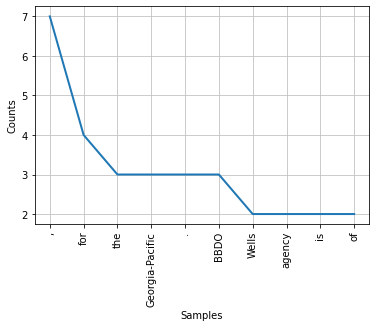

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [32]:
import matplotlib.pyplot as plt

fdist.plot(10)

### Remove punctuation marks

In [33]:

words_no_punc=[w for w in words if w.isalpha()==True]
print(words_no_punc[:50])
print(len(words_no_punc))

['The', 'fourth', 'Wells', 'account', 'moving', 'to', 'another', 'agency', 'is', 'the', 'packaged', 'division', 'of', 'which', 'arrived', 'at', 'Wells', 'only', 'last', 'fall', 'Like', 'Hertz', 'and', 'the', 'History', 'Channel', 'it', 'is', 'also', 'leaving', 'for', 'an', 'agency', 'the', 'BBDO', 'South', 'unit', 'of', 'BBDO', 'Worldwide', 'BBDO', 'South', 'in', 'Atlanta', 'which', 'handles', 'corporate', 'advertising', 'for', 'will']
72


### Plotting graph without punctuation marks

In [34]:
fdist=FreqDist(words_no_punc)
fdist.most_common(10)

[('for', 4),
 ('the', 3),
 ('BBDO', 3),
 ('Wells', 2),
 ('agency', 2),
 ('is', 2),
 ('of', 2),
 ('which', 2),
 ('and', 2),
 ('South', 2)]

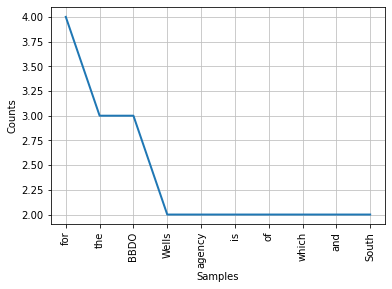

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [35]:
fdist.plot(10)

### List of stopwords

In [36]:
from nltk.corpus import stopwords

list_of_stopwords=stopwords.words("english")

print(list_of_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

### Removing stopwords

In [37]:
clean_words=[w for w in words_no_punc if w not in list_of_stopwords]

print(clean_words)

print(len(clean_words))



['The', 'fourth', 'Wells', 'account', 'moving', 'another', 'agency', 'packaged', 'division', 'arrived', 'Wells', 'last', 'fall', 'Like', 'Hertz', 'History', 'Channel', 'also', 'leaving', 'agency', 'BBDO', 'South', 'unit', 'BBDO', 'Worldwide', 'BBDO', 'South', 'Atlanta', 'handles', 'corporate', 'advertising', 'assume', 'additional', 'duties', 'brands', 'like', 'Angel', 'Soft', 'toilet', 'tissue', 'Sparkle', 'paper', 'towels', 'said', 'Ken', 'Haldin', 'spokesman', 'Atlanta']
48


### Final frequency distribution

In [38]:
fdist=FreqDist(clean_words)

fdist.most_common(10)

[('BBDO', 3),
 ('Wells', 2),
 ('agency', 2),
 ('South', 2),
 ('Atlanta', 2),
 ('The', 1),
 ('fourth', 1),
 ('account', 1),
 ('moving', 1),
 ('another', 1)]

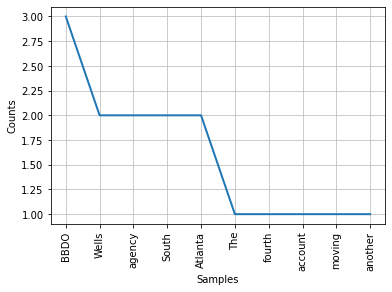

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [39]:
fdist.plot(10)

## Word Cloud

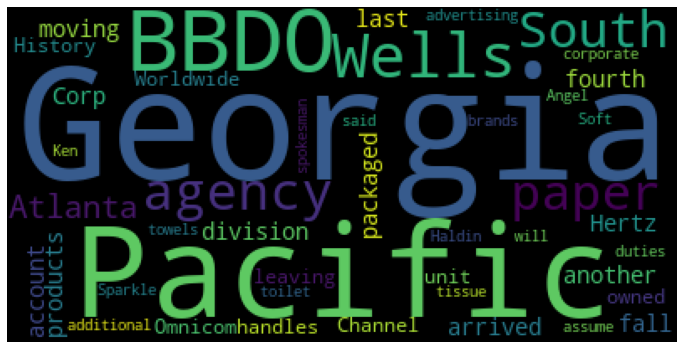

In [40]:
from wordcloud import WordCloud

wordcloud=WordCloud().generate(text)


plt.figure(figsize=(12,12))
plt.imshow(wordcloud)

plt.axis('off')
plt.show()

In [41]:
clean_words_joined=' '.join(clean_words)

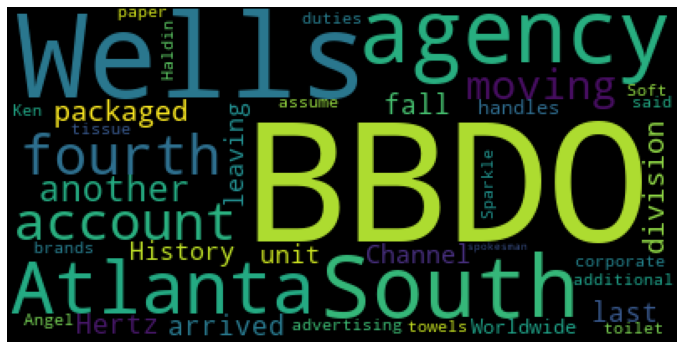

In [42]:
wordcloud=WordCloud().generate(clean_words_joined)


plt.figure(figsize=(12,12))
plt.imshow(wordcloud)

plt.axis('off')
plt.show()

In [43]:
wordcloud.words_

{'BBDO': 1.0,
 'Wells': 0.6666666666666666,
 'agency': 0.6666666666666666,
 'South': 0.6666666666666666,
 'Atlanta': 0.6666666666666666,
 'fourth': 0.3333333333333333,
 'account': 0.3333333333333333,
 'moving': 0.3333333333333333,
 'another': 0.3333333333333333,
 'packaged': 0.3333333333333333,
 'division': 0.3333333333333333,
 'arrived': 0.3333333333333333,
 'last': 0.3333333333333333,
 'fall': 0.3333333333333333,
 'Hertz': 0.3333333333333333,
 'History': 0.3333333333333333,
 'Channel': 0.3333333333333333,
 'leaving': 0.3333333333333333,
 'unit': 0.3333333333333333,
 'Worldwide': 0.3333333333333333,
 'handles': 0.3333333333333333,
 'corporate': 0.3333333333333333,
 'advertising': 0.3333333333333333,
 'assume': 0.3333333333333333,
 'additional': 0.3333333333333333,
 'duties': 0.3333333333333333,
 'brands': 0.3333333333333333,
 'Angel': 0.3333333333333333,
 'Soft': 0.3333333333333333,
 'toilet': 0.3333333333333333,
 'tissue': 0.3333333333333333,
 'Sparkle': 0.3333333333333333,
 'paper':

## Stemming

In [44]:
from nltk.stem import PorterStemmer

porter=PorterStemmer()

# word_list=['Programming','Programmers','Programmable','orbiter','electrical','studies','leaves','plays','am','is','were']
word_list=words

stemmed_words=[porter.stem(w) for w in word_list]

print(stemmed_words)

['the', 'fourth', 'well', 'account', 'move', 'to', 'anoth', 'agenc', 'is', 'the', 'packag', 'paper-product', 'divis', 'of', 'georgia-pacif', 'corp.', ',', 'which', 'arriv', 'at', 'well', 'onli', 'last', 'fall', '.', 'like', 'hertz', 'and', 'the', 'histori', 'channel', ',', 'it', 'is', 'also', 'leav', 'for', 'an', 'omnicom-own', 'agenc', ',', 'the', 'bbdo', 'south', 'unit', 'of', 'bbdo', 'worldwid', '.', 'bbdo', 'south', 'in', 'atlanta', ',', 'which', 'handl', 'corpor', 'advertis', 'for', 'georgia-pacif', ',', 'will', 'assum', 'addit', 'duti', 'for', 'brand', 'like', 'angel', 'soft', 'toilet', 'tissu', 'and', 'sparkl', 'paper', 'towel', ',', 'said', 'ken', 'haldin', ',', 'a', 'spokesman', 'for', 'georgia-pacif', 'in', 'atlanta', '.']


## Lemmatization

In [45]:
from nltk.stem import WordNetLemmatizer

lemmatizer=WordNetLemmatizer()

pos_list=['v','n','a','r']
print(f'word_list--->{word_list}')
for i in pos_list: 
    lemmatized_words=[lemmatizer.lemmatize(w,pos=i) for w in word_list]

    print(f' POS:{i}\n{lemmatized_words}')

word_list--->['The', 'fourth', 'Wells', 'account', 'moving', 'to', 'another', 'agency', 'is', 'the', 'packaged', 'paper-products', 'division', 'of', 'Georgia-Pacific', 'Corp.', ',', 'which', 'arrived', 'at', 'Wells', 'only', 'last', 'fall', '.', 'Like', 'Hertz', 'and', 'the', 'History', 'Channel', ',', 'it', 'is', 'also', 'leaving', 'for', 'an', 'Omnicom-owned', 'agency', ',', 'the', 'BBDO', 'South', 'unit', 'of', 'BBDO', 'Worldwide', '.', 'BBDO', 'South', 'in', 'Atlanta', ',', 'which', 'handles', 'corporate', 'advertising', 'for', 'Georgia-Pacific', ',', 'will', 'assume', 'additional', 'duties', 'for', 'brands', 'like', 'Angel', 'Soft', 'toilet', 'tissue', 'and', 'Sparkle', 'paper', 'towels', ',', 'said', 'Ken', 'Haldin', ',', 'a', 'spokesman', 'for', 'Georgia-Pacific', 'in', 'Atlanta', '.']
 POS:v
['The', 'fourth', 'Wells', 'account', 'move', 'to', 'another', 'agency', 'be', 'the', 'package', 'paper-products', 'division', 'of', 'Georgia-Pacific', 'Corp.', ',', 'which', 'arrive', 'at'

## Part of Speech Tagging (PoS tagging)

In [46]:
tagged_words=nltk.pos_tag(word_list)
print(tagged_words)

[('The', 'DT'), ('fourth', 'JJ'), ('Wells', 'NNP'), ('account', 'NN'), ('moving', 'VBG'), ('to', 'TO'), ('another', 'DT'), ('agency', 'NN'), ('is', 'VBZ'), ('the', 'DT'), ('packaged', 'VBN'), ('paper-products', 'NNS'), ('division', 'NN'), ('of', 'IN'), ('Georgia-Pacific', 'NNP'), ('Corp.', 'NNP'), (',', ','), ('which', 'WDT'), ('arrived', 'VBD'), ('at', 'IN'), ('Wells', 'NNP'), ('only', 'RB'), ('last', 'JJ'), ('fall', 'NN'), ('.', '.'), ('Like', 'IN'), ('Hertz', 'NNP'), ('and', 'CC'), ('the', 'DT'), ('History', 'NNP'), ('Channel', 'NNP'), (',', ','), ('it', 'PRP'), ('is', 'VBZ'), ('also', 'RB'), ('leaving', 'VBG'), ('for', 'IN'), ('an', 'DT'), ('Omnicom-owned', 'JJ'), ('agency', 'NN'), (',', ','), ('the', 'DT'), ('BBDO', 'NNP'), ('South', 'NNP'), ('unit', 'NN'), ('of', 'IN'), ('BBDO', 'NNP'), ('Worldwide', 'NNP'), ('.', '.'), ('BBDO', 'NNP'), ('South', 'NNP'), ('in', 'IN'), ('Atlanta', 'NNP'), (',', ','), ('which', 'WDT'), ('handles', 'VBZ'), ('corporate', 'JJ'), ('advertising', 'NN'),

In [ ]:
# sentence='The three-person EO-3 crew docked with Salyut 7 on 9 February, 1984, and entered the darkened station carrying flashlights.'
# sentence=text

# tokenized_words=word_tokenize(sentence)

# tagged_words=nltk.pos_tag(tokenized_words)

# tagged_words

## Chunking

In [47]:
grammar="NP : {<DT>?<JJ>*<NN>} "

parser=nltk.RegexpParser(grammar)

output= parser.parse(tagged_words)

print(output)
output.draw()

(S
  The/DT
  fourth/JJ
  Wells/NNP
  (NP account/NN)
  moving/VBG
  to/TO
  (NP another/DT agency/NN)
  is/VBZ
  the/DT
  packaged/VBN
  paper-products/NNS
  (NP division/NN)
  of/IN
  Georgia-Pacific/NNP
  Corp./NNP
  ,/,
  which/WDT
  arrived/VBD
  at/IN
  Wells/NNP
  only/RB
  (NP last/JJ fall/NN)
  ./.
  Like/IN
  Hertz/NNP
  and/CC
  the/DT
  History/NNP
  Channel/NNP
  ,/,
  it/PRP
  is/VBZ
  also/RB
  leaving/VBG
  for/IN
  (NP an/DT Omnicom-owned/JJ agency/NN)
  ,/,
  the/DT
  BBDO/NNP
  South/NNP
  (NP unit/NN)
  of/IN
  BBDO/NNP
  Worldwide/NNP
  ./.
  BBDO/NNP
  South/NNP
  in/IN
  Atlanta/NNP
  ,/,
  which/WDT
  handles/VBZ
  (NP corporate/JJ advertising/NN)
  for/IN
  Georgia-Pacific/NNP
  ,/,
  will/MD
  assume/VB
  additional/JJ
  duties/NNS
  for/IN
  brands/NNS
  like/IN
  Angel/NNP
  Soft/NNP
  (NP toilet/NN)
  (NP tissue/NN)
  and/CC
  Sparkle/NNP
  (NP paper/NN)
  towels/NNS
  ,/,
  said/VBD
  Ken/NNP
  Haldin/NNP
  ,/,
  (NP a/DT spokesman/NN)
  for/IN
  Georgia-P

## Chinking

In [48]:
grammar=r"""NP : {<.*>+}
}<JJ>+{"""
parser=nltk.RegexpParser(grammar)

output= parser.parse(tagged_words)

print(output)
# output.draw()

(S
  (NP The/DT)
  fourth/JJ
  (NP
    Wells/NNP
    account/NN
    moving/VBG
    to/TO
    another/DT
    agency/NN
    is/VBZ
    the/DT
    packaged/VBN
    paper-products/NNS
    division/NN
    of/IN
    Georgia-Pacific/NNP
    Corp./NNP
    ,/,
    which/WDT
    arrived/VBD
    at/IN
    Wells/NNP
    only/RB)
  last/JJ
  (NP
    fall/NN
    ./.
    Like/IN
    Hertz/NNP
    and/CC
    the/DT
    History/NNP
    Channel/NNP
    ,/,
    it/PRP
    is/VBZ
    also/RB
    leaving/VBG
    for/IN
    an/DT)
  Omnicom-owned/JJ
  (NP
    agency/NN
    ,/,
    the/DT
    BBDO/NNP
    South/NNP
    unit/NN
    of/IN
    BBDO/NNP
    Worldwide/NNP
    ./.
    BBDO/NNP
    South/NNP
    in/IN
    Atlanta/NNP
    ,/,
    which/WDT
    handles/VBZ)
  corporate/JJ
  (NP
    advertising/NN
    for/IN
    Georgia-Pacific/NNP
    ,/,
    will/MD
    assume/VB)
  additional/JJ
  (NP
    duties/NNS
    for/IN
    brands/NNS
    like/IN
    Angel/NNP
    Soft/NNP
    toilet/NN
    tissue/NN
    and

## Named Entity Recognition (NER)

In [49]:
sentence=text

tokenized_words=word_tokenize(sentence)

tagged_words=nltk.pos_tag(tokenized_words)
N_E_R=nltk.ne_chunk(tagged_words,binary=False)

print(N_E_R)

(S
  The/DT
  fourth/JJ
  Wells/NNP
  account/NN
  moving/VBG
  to/TO
  another/DT
  agency/NN
  is/VBZ
  the/DT
  packaged/VBN
  paper-products/NNS
  division/NN
  of/IN
  (ORGANIZATION Georgia-Pacific/NNP Corp./NNP)
  ,/,
  which/WDT
  arrived/VBD
  at/IN
  (ORGANIZATION Wells/NNP)
  only/RB
  last/JJ
  fall/NN
  ./.
  Like/IN
  (PERSON Hertz/NNP)
  and/CC
  the/DT
  (ORGANIZATION History/NNP Channel/NNP)
  ,/,
  it/PRP
  is/VBZ
  also/RB
  leaving/VBG
  for/IN
  an/DT
  Omnicom-owned/JJ
  agency/NN
  ,/,
  the/DT
  (ORGANIZATION BBDO/NNP South/NNP)
  unit/NN
  of/IN
  (ORGANIZATION BBDO/NNP Worldwide/NNP)
  ./.
  (ORGANIZATION BBDO/NNP South/NNP)
  in/IN
  (GPE Atlanta/NNP)
  ,/,
  which/WDT
  handles/VBZ
  corporate/JJ
  advertising/NN
  for/IN
  Georgia-Pacific/NNP
  ,/,
  will/MD
  assume/VB
  additional/JJ
  duties/NNS
  for/IN
  brands/NNS
  like/IN
  (PERSON Angel/NNP Soft/NNP)
  toilet/NN
  tissue/NN
  and/CC
  (GPE Sparkle/NNP)
  paper/NN
  towels/NNS
  ,/,
  said/VBD
  (PER

In [50]:
# N_E_R.draw()


## WordNet

In [51]:
from nltk.corpus import wordnet



In [52]:
for words in wordnet.synsets('car'):
    print(f'{words.name()}\n{words.definition()}\n{words.examples()}\n')

    for lemma in words.lemmas():
        print(lemma)
    print('\n')

car.n.01
a motor vehicle with four wheels; usually propelled by an internal combustion engine
['he needs a car to get to work']

Lemma('car.n.01.car')
Lemma('car.n.01.auto')
Lemma('car.n.01.automobile')
Lemma('car.n.01.machine')
Lemma('car.n.01.motorcar')


car.n.02
a wheeled vehicle adapted to the rails of railroad
['three cars had jumped the rails']

Lemma('car.n.02.car')
Lemma('car.n.02.railcar')
Lemma('car.n.02.railway_car')
Lemma('car.n.02.railroad_car')


car.n.03
the compartment that is suspended from an airship and that carries personnel and the cargo and the power plant
[]

Lemma('car.n.03.car')
Lemma('car.n.03.gondola')


car.n.04
where passengers ride up and down
['the car was on the top floor']

Lemma('car.n.04.car')
Lemma('car.n.04.elevator_car')


cable_car.n.01
a conveyance for passengers or freight on a cable railway
['they took a cable car to the top of the mountain']

Lemma('cable_car.n.01.cable_car')
Lemma('cable_car.n.01.car')




###  Hypernyms: Hypernyms gives us a more abstract term for a word.

In [53]:
word=wordnet.synsets('rocket')[0]

print(word.hypernyms())

[Synset('vehicle.n.01')]


### Hyponyms: Hyponyms gives us a more specific term for a word.

In [54]:
word=wordnet.synsets('rocket')[0]

print(word.hyponyms())

[Synset('missile.n.01'), Synset('multistage_rocket.n.01'), Synset('test_rocket.n.01')]


In [55]:
[word.hyponyms()[i].name() for i in range(len(word.hyponyms()))]

['missile.n.01', 'multistage_rocket.n.01', 'test_rocket.n.01']

### Get a name only

In [56]:
word=wordnet.synsets('rocket')[0]
print(word.lemmas()[0].name())

rocket


### Synonyms.

In [57]:
synonyms=[]

for words in wordnet.synsets('rocket'):
    for lemma in words.lemmas():
        synonyms.append(lemma.name())
synonyms

['rocket',
 'projectile',
 'rocket',
 'rocket_engine',
 'rocket',
 'roquette',
 'garden_rocket',
 'rocket_salad',
 'arugula',
 'Eruca_sativa',
 'Eruca_vesicaria_sativa',
 'rocket',
 'skyrocket',
 'skyrocket',
 'rocket',
 'rocket',
 'skyrocket',
 'rocket']

### Antonyms

In [58]:
antonyms=[]

for words in wordnet.synsets('Natural'):
    for lemma in words.lemmas():
        if lemma.antonyms():
            antonyms.append(lemma.antonyms()[0].name())
antonyms

['unnatural', 'artificial', 'supernatural', 'sharp']

### Synonyms and antonyms

In [59]:
synonyms=[]
antonyms=[]
for words in wordnet.synsets('Natural'):
    for lemma in words.lemmas():
        synonyms.append(lemma.name())
        if lemma.antonyms():
            antonyms.append(lemma.antonyms()[0].name())


print(f'synonyms:\n{synonyms}\n')
print(f'antonyms:\n{antonyms}\n')

synonyms:
['natural', 'natural', 'cancel', 'natural', 'natural', 'natural', 'natural', 'natural', 'natural', 'natural', 'instinctive', 'natural', 'raw', 'rude', 'natural', 'natural', 'born', 'innate', 'lifelike', 'natural']

antonyms:
['unnatural', 'artificial', 'supernatural', 'sharp']



###  Finding the similarity between words

In [60]:
word1=wordnet.synsets('ship','n')[0]

word2=wordnet.synsets('dog','n')[0]

word1.wup_similarity(word2)


0.4

# Bag-of-Words

In [73]:
# from collections import Counter

# text=text.lower()
# Counter(word_tokenize(text))

# Counter(text).most_common(2)
# Counter(word_tokenize(text)).most_common(2)

In [79]:
from sklearn.feature_extraction.text import CountVectorizer

# sentences=['Jim is a person', 'Jim likes to fly.', 'Jim wants to walk his dog.']

ngrams=1
cv=CountVectorizer(stop_words='english',ngram_range=(ngrams,ngrams))

B_O_W= cv.fit_transform(sentences).toarray()
sum_words = B_O_W.sum(axis=0)
words_freq = [(word, sum_words[idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1],reverse=True)


print(cv.vocabulary_)
print(cv.get_feature_names())
print(B_O_W)
print(f'BOW shape: {B_O_W.shape}')
print(sum_words)
print(words_freq)

{'fourth': 16, 'wells': 41, 'account': 0, 'moving': 25, 'agency': 3, 'packaged': 29, 'paper': 30, 'products': 31, 'division': 13, 'georgia': 17, 'pacific': 28, 'corp': 11, 'arrived': 5, 'fall': 15, 'like': 24, 'hertz': 20, 'history': 21, 'channel': 10, 'leaving': 23, 'omnicom': 26, 'owned': 27, 'bbdo': 8, 'south': 34, 'unit': 40, 'worldwide': 42, 'atlanta': 7, 'handles': 19, 'corporate': 12, 'advertising': 2, 'assume': 6, 'additional': 1, 'duties': 14, 'brands': 9, 'angel': 4, 'soft': 33, 'toilet': 38, 'tissue': 37, 'sparkle': 35, 'towels': 39, 'said': 32, 'ken': 22, 'haldin': 18, 'spokesman': 36}
['account', 'additional', 'advertising', 'agency', 'angel', 'arrived', 'assume', 'atlanta', 'bbdo', 'brands', 'channel', 'corp', 'corporate', 'division', 'duties', 'fall', 'fourth', 'georgia', 'haldin', 'handles', 'hertz', 'history', 'ken', 'leaving', 'like', 'moving', 'omnicom', 'owned', 'pacific', 'packaged', 'paper', 'products', 'said', 'soft', 'south', 'sparkle', 'spokesman', 'tissue', 't

c:\Users\dowdj\OneDrive\Documents\GitHub\NLP-Training\nltk\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [80]:
n=20
top_words = words_freq[0:n]
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]

top_df.head()

,Word,Freq
0,georgia,3
1,pacific,3
2,bbdo,3
3,wells,2
4,agency,2


[Text(0, 0, 'georgia'),
 Text(1, 0, 'pacific'),
 Text(2, 0, 'bbdo'),
 Text(3, 0, 'wells'),
 Text(4, 0, 'agency'),
 Text(5, 0, 'paper'),
 Text(6, 0, 'like'),
 Text(7, 0, 'south'),
 Text(8, 0, 'atlanta'),
 Text(9, 0, 'fourth'),
 Text(10, 0, 'account'),
 Text(11, 0, 'moving'),
 Text(12, 0, 'packaged'),
 Text(13, 0, 'products'),
 Text(14, 0, 'division'),
 Text(15, 0, 'corp'),
 Text(16, 0, 'arrived'),
 Text(17, 0, 'fall'),
 Text(18, 0, 'hertz'),
 Text(19, 0, 'history')]

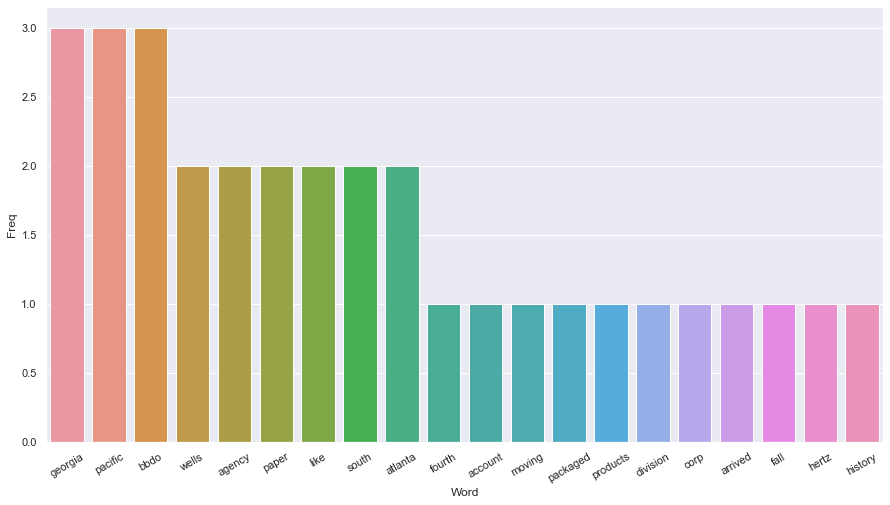

In [81]:
sns.set(rc={'figure.figsize':(15,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

In [82]:
sentence=text

tokenized_words=word_tokenize(sentence)

tagged_words=nltk.pos_tag(tokenized_words)



tagged_words

[('The', 'DT'),
 ('fourth', 'JJ'),
 ('Wells', 'NNP'),
 ('account', 'NN'),
 ('moving', 'VBG'),
 ('to', 'TO'),
 ('another', 'DT'),
 ('agency', 'NN'),
 ('is', 'VBZ'),
 ('the', 'DT'),
 ('packaged', 'VBN'),
 ('paper-products', 'NNS'),
 ('division', 'NN'),
 ('of', 'IN'),
 ('Georgia-Pacific', 'NNP'),
 ('Corp.', 'NNP'),
 (',', ','),
 ('which', 'WDT'),
 ('arrived', 'VBD'),
 ('at', 'IN'),
 ('Wells', 'NNP'),
 ('only', 'RB'),
 ('last', 'JJ'),
 ('fall', 'NN'),
 ('.', '.'),
 ('Like', 'IN'),
 ('Hertz', 'NNP'),
 ('and', 'CC'),
 ('the', 'DT'),
 ('History', 'NNP'),
 ('Channel', 'NNP'),
 (',', ','),
 ('it', 'PRP'),
 ('is', 'VBZ'),
 ('also', 'RB'),
 ('leaving', 'VBG'),
 ('for', 'IN'),
 ('an', 'DT'),
 ('Omnicom-owned', 'JJ'),
 ('agency', 'NN'),
 (',', ','),
 ('the', 'DT'),
 ('BBDO', 'NNP'),
 ('South', 'NNP'),
 ('unit', 'NN'),
 ('of', 'IN'),
 ('BBDO', 'NNP'),
 ('Worldwide', 'NNP'),
 ('.', '.'),
 ('BBDO', 'NNP'),
 ('South', 'NNP'),
 ('in', 'IN'),
 ('Atlanta', 'NNP'),
 (',', ','),
 ('which', 'WDT'),
 ('handle

## TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer=TfidfVectorizer(norm=None,stop_words='english')

X=vectorizer.fit_transform(sentences).toarray()

print(vectorizer.vocabulary_)
print(vectorizer.get_feature_names())
print(X)

In [ ]:
X.shape

In [ ]:
# """Example of Python client calling Knowledge Graph Search API."""
# from __future__ import print_function
# import json
# import urllib

# api_key = open('.api_key').read()
# query = 'Taylor Swift'
# service_url = 'https://kgsearch.googleapis.com/v1/entities:search'
# params = {
#     'query': query,
#     'limit': 10,
#     'indent': True,
#     'key': api_key,
# }
# url = service_url + '?' + urllib.urlencode(params)
# response = json.loads(urllib.urlopen(url).read())
# for element in response['itemListElement']:
#   print(element['result']['name'] + ' (' + str(element['resultScore']) + ')')
